In [1]:
import copy as cp
from pylab import *
from modeltech import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import metpy.units as units 

In [3]:
runinput = model_input()

runinput.dt         = 60.       # time step [s]
runinput.runtime    = 12*3600    # total run time [s]

# mixed-layer input
runinput.sw_ml      = True      # mixed-layer model switch
runinput.sw_shearwe = False     # shear growth mixed-layer switch
runinput.sw_fixft   = False     # Fix the free-troposphere switch
runinput.h          = 200.      # initial ABL height [m]
runinput.Ps         = 101300.   # surface pressure [Pa]
runinput.divU       = 0.        # horizontal large-scale divergence of wind [s-1]
runinput.fc         = 1.e-4     # Coriolis parameter [m s-1]

runinput.theta      = 288.      # initial mixed-layer potential temperature [K]
runinput.dtheta     = 1.        # initial temperature jump at h [K]
runinput.gammatheta = 0.006   # free atmosphere potential temperature lapse rate [K m-1]
runinput.advtheta   = 0.        # advection of heat [K s-1]
runinput.beta       = 0.2       # entrainment ratio for virtual heat [-]
runinput.wtheta     = 0.1       # surface kinematic heat flux [K m s-1]

runinput.q          = 0.008  # initial mixed-layer specific humidity [kg kg-1]
runinput.dq         = -0.001    # initial specific humidity jump at h [kg kg-1]
runinput.gammaq     = -0.006e-3        # free atmosphere specific humidity lapse rate [kg kg-1 m-1]
runinput.advq       = 0.        # advection of moisture [kg kg-1 s-1]
runinput.wq         = 0.1e-3    # surface kinematic moisture flux [kg kg-1 m s-1]

runinput.CO2        = 422.      # initial mixed-layer CO2 [ppm]
runinput.dCO2       = -44.      # initial CO2 jump at h [ppm]
runinput.gammaCO2   = 0.        # free atmosphere CO2 lapse rate [ppm m-1]
runinput.advCO2     = 0.        # advection of CO2 [ppm s-1]
runinput.wCO2       = 0.        # surface kinematic CO2 flux [ppm m s-1]

runinput.sw_wind    = False     # prognostic wind switch
runinput.u          = 6.        # initial mixed-layer u-wind speed [m s-1]
runinput.du         = 4.        # initial u-wind jump at h [m s-1]
runinput.gammau     = 0.        # free atmosphere u-wind speed lapse rate [s-1]
runinput.advu       = 0.        # advection of u-wind [m s-2]

runinput.v          = -4.0      # initial mixed-layer u-wind speed [m s-1]
runinput.dv         = 4.0       # initial u-wind jump at h [m s-1]
runinput.gammav     = 0.        # free atmosphere v-wind speed lapse rate [s-1]
runinput.advv       = 0.        # advection of v-wind [m s-2]

runinput.sw_sl      = False     # surface layer switch
runinput.ustar      = 0.3       # surface friction velocity [m s-1]
runinput.z0m        = 0.02      # roughness length for momentum [m]
runinput.z0h        = 0.002     # roughness length for scalars [m]

runinput.sw_rad     = False     # radiation switch
runinput.lat        = 51.97     # latitude [deg]
runinput.lon        = -4.93     # longitude [deg]
runinput.doy        = 268.      # day of the year [-]
runinput.tstart     = 6.8       # time of the day [h UTC]
runinput.cc         = 0.0       # cloud cover fraction [-]
runinput.Q          = 400.      # net radiation [W m-2] 
runinput.dFz        = 0.        # cloud top radiative divergence [W m-2] 

runinput.sw_ls      = False     # land surface switch
runinput.ls_type    = 'js'      # land-surface parameterization ('js' for Jarvis-Stewart or 'ags' for A-Gs)
runinput.wg         = 0.21      # volumetric water content top soil layer [m3 m-3]
runinput.w2         = 0.21      # volumetric water content deeper soil layer [m3 m-3]
runinput.cveg       = 0.85      # vegetation fraction [-]
runinput.Tsoil      = 285.      # temperature top soil layer [K]
runinput.T2         = 286.      # temperature deeper soil layer [K]
runinput.a          = 0.219     # Clapp and Hornberger retention curve parameter a
runinput.b          = 4.90      # Clapp and Hornberger retention curve parameter b
runinput.p          = 4.        # Clapp and Hornberger retention curve parameter c
runinput.CGsat      = 3.56e-6   # saturated soil conductivity for heat

runinput.wsat       = 0.472     # saturated volumetric water content ECMWF config [-]
runinput.wfc        = 0.323     # volumetric water content field capacity [-]
runinput.wwilt      = 0.171     # volumetric water content wilting point [-]

runinput.C1sat      = 0.132     
runinput.C2ref      = 1.8

runinput.LAI        = 2.        # leaf area index [-]
runinput.gD         = 0.0       # correction factor transpiration for VPD [-]
runinput.rsmin      = 110.      # minimum resistance transpiration [s m-1]
runinput.rssoilmin  = 50.       # minimun resistance soil evaporation [s m-1]
runinput.alpha      = 0.25      # surface albedo [-]

runinput.Ts         = 290.      # initial surface temperature [K]

runinput.Wmax       = 0.0002    # thickness of water layer on wet vegetation [m]
runinput.Wl         = 0.0000    # equivalent water layer depth for wet vegetation [m]

runinput.Lambda     = 5.9       # thermal diffusivity skin layer [-]

runinput.c3c4       = 'c3'      # Plant type ('c3' or 'c4')

runinput.sw_cu      = False     # Cumulus parameterization switch
runinput.dz_h       = 150.      # Transition layer thickness [m]

"""
Init and run the model
"""

# # runinput.wg         = 0.005      # volumetric water content top soil layer [m3 m-3]
# # runinput.w2         = 0.005      # volumetric water content deeper soil layer [m3 m-3]

runinput.sw_ml      = True      # mixed-layer model switch
runinput.sw_shearwe = True     # shear growth mixed-layer switch
runinput.sw_fixft   = False     # Fix the free-troposphere switch
runinput.sw_wind    = False
runinput.sw_sl      = True     # surface layer switch
runinput.sw_rad     = True     # radiation switch
runinput.sw_ls      = True     # land surface switch --> makes everything super sensitive to initial theta.
runinput.sw_cu      = False    # Cumulus parameterization switch

# runinput.Ps         = 101000.   # surface pressure [Pa]


runinput.sw_ml      = True      # mixed-layer model switch
runinput.sw_shearwe = False     # shear growth mixed-layer switch
runinput.sw_fixft   = False     # Fix the free-troposphere switch
runinput.sw_wind    = False
runinput.sw_sl      = True     # surface layer switch
runinput.sw_rad     = True     # radiation switch
runinput.sw_ls      = True     # land surface switch --> makes everything super sensitive to initial theta.
runinput.sw_cu      = False    # Cumulus parameterization switch
runinput.sw_tech    = False    # Evaporation technology switch. Part of the land surface module.

runinput.lat        = 40
runinput.lon        = 0
runinput.doy        = 106 # mid April
runinput.h = 100
runinput.runtime = 6*3600

In [79]:
def find_nearest(array, value):
    """
    Function to find the index of the value in an array nearest to given value
    By Gijs van Leeuwen https://github.com/gjvanleeuwen

    Parameters
    ----------
    array : 1d.array
        1d np array wih random values, floats or ints
    value : float or int
        value to look for in array

    Returns
    -------
    idx : int
        index for nearest value

    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def profile(phi, h, gamma, Delta, rho=1.2, g=9.81, p0=101300.):
    z = np.arange(0,10000, 1)
    p = p0 - rho*g*z
    prof = np.zeros(np.shape(z))
    i = find_nearest(z, h)
    prof[:i] = phi
    prof[i:] = phi + Delta + gamma*(z[i:]-z[i])
    return prof, z, p

def Tprofile(theta, p, p0=101300., Rd=287., cp=1005.):
    return theta*(p/p0)**(Rd/cp)

def LFC_calc(theta, q, gammatheta, gammaq, Dtheta, Dq, h, p0=101300.*units.units.Pa, rho=1.2*units.units('kg/m^3'), g=9.81*units.units('m/s^2')):
    try:
        theta_prof, z_prof, p_prof = profile(phi=theta, h=h, gamma=gammatheta, Delta=Dtheta)
        T_prof = Tprofile(theta_prof, p_prof)
        q_prof, _, _ = profile(phi=q, h=h, gamma=gammaq, Delta=Dq)

        T = T_prof*units.units.K
        q = q_prof*units.units('kg/kg')
        p = p_prof*units.units.Pa
        
        Td = mpcalc.dewpoint_from_specific_humidity(pressure=p, temperature=T, specific_humidity=q)
        pLFC, TLFC = mpcalc.lfc(pressure=p, temperature=T, dewpoint=Td)
        # pLFC, TLFC = mpcalc.lcl(pressure=p, temperature=T, dewpoint=Td)
        hLFC = -(pLFC - p0)/(rho*g)

        hpres =-rho*g*h*units.units.m + p0
        CAPE, CIN = mpcalc.most_unstable_cape_cin(pressure=p, temperature=T, dewpoint=Td)
        # CAPE, CIN = mpcalc.mixed_layer_cape_cin(pressure=p, temperature=T, dewpoint=Td, parcel_start_pressure=p0, depth=rho*g*h*units.units.m)
        return hLFC.to('m').magnitude, CAPE.magnitude, CIN.magnitude
    except Exception as e:
        # Handle any exceptions and return None for all values
        print(f"An error occurred: {e}")
        return None, None, None


def calcsumrad(flux, dt):
    ''' result in W/m2 * second'''
    return np.sum(flux)*dt


In [80]:
n = 5
colnames = ["tstart", "theta_ini", "q_ini", "h", "theta", "q", "LCL", "LFC", "CAPE", "CIN", "pwater", "lwater", "evapwater", "sumH", "sumLE", "sumQ", "Dtheta", "Dq", "RH_h"]

df1 = pd.DataFrame(columns=colnames, index=np.arange(n))
df2 = pd.DataFrame(columns=colnames, index=np.arange(n))
df3 = pd.DataFrame(columns=colnames, index=np.arange(n))

RH = 70*units.units('%')
# fig, ax = plt.subplots(3,2, figsize=(10,10), sharex=True, sharey=True)
pressure = runinput.Ps*units.units.Pa

for i, temp in enumerate(np.linspace(278,303,n, dtype=float)):

    T = temp*units.units.K
    Td_start = mpcalc.dewpoint_from_relative_humidity(temperature=T, relative_humidity=RH)
    q = mpcalc.specific_humidity_from_dewpoint(pressure=pressure, dewpoint=Td_start)


    runinput.tstart     = 9
    runinput.theta = temp
    runinput.gammatheta = 4e-3 
    runinput.q = q.magnitude
    runinput.gammaq = -1.5e-6

    run1input = cp.deepcopy(runinput)
    run1input.wg         =  0.171+0.01
    run1input.w2         =  0.171+0.01

    run2input = cp.deepcopy(runinput)
    run2input.wg         = 0.323
    run2input.w2         = 0.323

    run3input = cp.deepcopy(runinput)
    run3input.sw_tech = True
    run3input.rstech = 0 

    r1 = model(run1input)
    r1.run()

    # Td_prof = mpcalc.dewpoint_from_specific_humidity(pressure=p_prof*units.units.Pa, temperature=T_prof*units.units.K, specific_humidity=q_prof*units.units('kg/kg'))
    zLFC1, CAPE1, CIN1 = LFC_calc(theta=r1.out.theta[-1], q=r1.out.q[-1], gammatheta=runinput.gammatheta, gammaq=runinput.gammaq, Dtheta=r1.out.dtheta[-1], Dq=r1.out.dq[-1], h=r1.out.h[-1])

    sumH1 = calcsumrad(r1.out.H, dt=runinput.dt)
    sumLE1 = calcsumrad(r1.out.LE, dt=runinput.dt)
    sumQ1 = calcsumrad(r1.out.Q, dt=runinput.dt)

    pwater1 = None
    lwater1 = None 
    evapwater1 = None

    r2 = model(run2input)
    r2.run()

    zLFC2, CAPE2, CIN2 = LFC_calc(theta=r2.out.theta[-1], q=r2.out.q[-1], gammatheta=runinput.gammatheta, gammaq=runinput.gammaq, Dtheta=r2.out.dtheta[-1], Dq=r2.out.dq[-1], h=r2.out.h[-1])

    sumH2 = calcsumrad(r2.out.H, dt=runinput.dt)
    sumLE2 = calcsumrad(r2.out.LE, dt=runinput.dt)
    sumQ2 = calcsumrad(r2.out.Q, dt=runinput.dt)

    pwater2 = None
    lwater2 = None 
    evapwater2 = None

    r3 = model(run3input)
    r3.run()

    zLFC3, CAPE3, CIN3 = LFC_calc(theta=r3.out.theta[-1], q=r3.out.q[-1], gammatheta=runinput.gammatheta, gammaq=runinput.gammaq, Dtheta=r3.out.dtheta[-1], Dq=r3.out.dq[-1], h=r3.out.h[-1])

    sumH3 = calcsumrad(r3.out.H, dt=runinput.dt)
    sumLE3 = calcsumrad(r3.out.LE, dt=runinput.dt)
    sumQ3 = calcsumrad(r3.out.Q, dt=runinput.dt)

    pwater3 = None
    lwater3 = None 
    evapwater3 = None

    df1.loc[i] = pd.Series({
        'tstart': runinput.tstart,
        'theta_ini': runinput.theta,
        'q_ini': runinput.q,
        'h': r1.out.h[-1],
        'theta': r1.out.theta[-1],
        'q': r1.out.q[-1],
        'LCL': r1.out.zlcl[-1],
        'LFC': zLFC1,
        'CAPE': CAPE1,
        'CIN': CIN1,
        'pwater': pwater1,
        'lwater': lwater1,
        'evapwater': evapwater1,
        'sumH': sumH1,
        'sumLE': sumLE1,
        'sumQ': sumQ1,
        'Dtheta': r1.out.dtheta[-1],
        'Dq': r1.out.dq[-1],
        'RH_h': r1.out.RH_h[-1]
        })

    df2.loc[i] = pd.Series({
        'tstart': runinput.tstart,
        'theta_ini': runinput.theta,
        'q_ini': runinput.q,
        'h': r2.out.h[-1],
        'theta': r2.out.theta[-1],
        'q': r2.out.q[-1],
        'LCL': r2.out.zlcl[-1],
        'LFC': zLFC2,
        'CAPE': CAPE2,
        'CIN': CIN2,
        'pwater': pwater2,
        'lwater': lwater2,
        'evapwater': evapwater2,
        'sumH': sumH2,
        'sumLE': sumLE2,
        'sumQ': sumQ2,
        'Dtheta': r2.out.dtheta[-1],
        'Dq': r2.out.dq[-1],
        'RH_h': r2.out.RH_h[-1]
        })

    df3.loc[i] = pd.Series({
        'tstart': runinput.tstart,
        'theta_ini': runinput.theta,
        'q_ini': runinput.q,
        'h': r3.out.h[-1],
        'theta': r3.out.theta[-1],
        'q': r3.out.q[-1],
        'LCL': r3.out.zlcl[-1],
        'LFC': zLFC3,
        'CAPE': CAPE3,
        'CIN': CIN3,
        'pwater': pwater3,
        'lwater': lwater3,
        'evapwater': evapwater3,
        'sumH': sumH3,
        'sumLE': sumLE3,
        'sumQ': sumQ3,
        'Dtheta': r3.out.dtheta[-1],
        'Dq': r3.out.dq[-1],
        'RH_h': r3.out.RH_h[-1]
        })


#     ax[0,0].scatter(runinput.theta, r1.out.h[-1], c='k')
#     ax[1,0].scatter(runinput.theta, r2.out.h[-1], c='g')
#     ax[2,0].scatter(runinput.theta, r3.out.h[-1], c='b')

#     ax[0,0].scatter(runinput.theta, r1.out.zlcl[-1], c='k', marker='v')
#     ax[1,0].scatter(runinput.theta, r2.out.zlcl[-1], c='g', marker='v')
#     ax[2,0].scatter(runinput.theta, r3.out.zlcl[-1], c='b', marker='v')

#     ax[0,0].scatter(runinput.theta, zLFC1, c='k', marker='^')
#     ax[1,0].scatter(runinput.theta, zLFC2, c='g', marker='^')
#     ax[2,0].scatter(runinput.theta, zLFC3, c='b', marker='^')

#     ax[0,1].scatter(runinput.theta, r1.out.h[-1], c='k')
#     ax[0,1].scatter(runinput.theta, r2.out.h[-1], c='g')
#     ax[0,1].scatter(runinput.theta, r3.out.h[-1], c='b')

#     ax[1,1].scatter(runinput.theta, r1.out.zlcl[-1], c='k', marker='v')
#     ax[1,1].scatter(runinput.theta, r2.out.zlcl[-1], c='g', marker='v')
#     ax[1,1].scatter(runinput.theta, r3.out.zlcl[-1], c='b', marker='v')

#     ax[2,1].scatter(runinput.theta, zLFC1, c='k', marker='^')
#     ax[2,1].scatter(runinput.theta, zLFC2, c='g', marker='^')
#     ax[2,1].scatter(runinput.theta, zLFC3, c='b', marker='^')

# ax[0,0].set_title("run 1")
# ax[1,0].set_title("run 2")
# ax[2,0].set_title("run 3")
# ax[0,1].set_title("h")
# ax[1,1].set_title("LCL")
# ax[2,1].set_title("LFC")

# plt.show()


C:\Users\sarah\AppData\Local\Temp\ipykernel_7848\89347448.py:33: RuntimeWarning: invalid value encountered in power
  return theta*(p/p0)**(Rd/cp)
c:\Users\sarah\miniconda3\envs\Wetsus_env\Lib\site-packages\metpy\calc\thermo.py:1313: RuntimeWarning: overflow encountered in exp
  return mpconsts.nounit.sat_pressure_0c * np.exp(
c:\Users\sarah\miniconda3\envs\Wetsus_env\Lib\site-packages\metpy\calc\thermo.py:1458: RuntimeWarning: invalid value encountered in divide
  return molecular_weight_ratio * partial_press / (total_press - partial_press)
c:\Users\sarah\miniconda3\envs\Wetsus_env\Lib\site-packages\pint\facets\plain\quantity.py:986: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
c:\Users\sarah\miniconda3\envs\Wetsus_env\Lib\site-packages\pint\facets\plain\quantity.py:986: RuntimeWarning: overflow encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
c:\Users\sarah\miniconda3\envs

An error occurred: zero-size array to reduction operation minimum which has no identity
An error occurred: zero-size array to reduction operation minimum which has no identity


C:\Users\sarah\AppData\Local\Temp\ipykernel_7848\89347448.py:51: UserWarning: Interpolation point out of data bounds encountered
  CAPE, CIN = mpcalc.most_unstable_cape_cin(pressure=p, temperature=T, dewpoint=Td)
C:\Users\sarah\AppData\Local\Temp\ipykernel_7848\89347448.py:45: UserWarning: Relative humidity >120%, ensure proper units.
  Td = mpcalc.dewpoint_from_specific_humidity(pressure=p, temperature=T, specific_humidity=q)
c:\Users\sarah\miniconda3\envs\Wetsus_env\Lib\site-packages\metpy\calc\thermo.py:1397: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


An error occurred: zero-size array to reduction operation minimum which has no identity


In [81]:
df1

tstart theta_ini     q_ini            h       theta         q          LCL  \
0    9.0     278.0  0.003718  2261.456934  286.117649  0.001303  3322.339407   
1    9.0    284.25  0.005695  2140.071607  291.947419  0.003439  2517.016902   
2    9.0     290.5  0.008553  2012.797651   297.75626   0.00647  2149.394888   
3    9.0    296.75  0.012612  1885.097007  303.564063  0.010704  1943.355392   
4    9.0     303.0  0.018291  1766.421498  309.405918  0.016531  1821.834774   

           LFC         CAPE        CIN pwater lwater evapwater  \
0          NaN          NaN        NaN    NaN    NaN       NaN   
1  2258.039326          0.0        0.0    NaN    NaN       NaN   
2  2618.760349    19.948565 -64.701554    NaN    NaN       NaN   
3   2038.51913  1223.426156 -50.245873    NaN    NaN       NaN   
4  1847.245704  9922.006034 -33.960951    NaN    NaN       NaN   

             sumH           sumLE            sumQ    Dtheta        Dq  \
0  8237911.383198   666100.330247  9925764.348943  1.528179 -0.001827   
1  7344929.288144  1047846.254541  9843388.645968  1.462868 -0.001804   
2  6462900.246032   1433104.28209  9771355.452398  1.394931 -0.001787   
3   5636307.37481  1761576.016245  9700730.833321  1.326325 -0.001769   
4  4925590.058055  1945587.012952  9615008.532716  1.259768  -0.00174   

       RH_h  
0  0.511191  
1  0.804972  
2  0.929823  
3   0.97148  
4  0.974546

In [82]:
df2

tstart theta_ini     q_ini            h       theta         q          LCL  \
0    9.0     278.0  0.003718  1849.867783  284.616824  0.002357  2195.587121   
1    9.0    284.25  0.005695   1595.45867  289.941927  0.004932  1626.717022   
2    9.0     290.5  0.008553  1358.042834  295.315066  0.008414  1332.932655   
3    9.0    296.75  0.012612  1137.846583  300.733753   0.01314  1153.668933   
4    9.0     303.0  0.018291   939.650441  306.213236  0.019524  1035.865152   

           LFC         CAPE        CIN pwater lwater evapwater  \
0          NaN          NaN        NaN    NaN    NaN       NaN   
1  1547.339968          0.0        0.0    NaN    NaN       NaN   
2   1809.80275   243.359256 -30.342732    NaN    NaN       NaN   
3   1518.23367  4022.218084  -7.274747    NaN    NaN       NaN   
4          NaN          NaN        NaN    NaN    NaN       NaN   

             sumH           sumLE             sumQ    Dtheta        Dq  \
0  5244409.125753   4626796.91103   10510395.53961  1.382647 -0.002264   
1  3739374.116505  5892463.835636  10617690.928188  1.289908  -0.00248   
2  2541491.386427  6786527.264818  10698080.213198  1.217105 -0.002748   
3  1610363.839048  7348899.526556  10749292.133404  1.167633 -0.003084   
4   923489.750268  7591983.590971   10763588.50784  1.145366 -0.003493   

       RH_h  
0  0.809543  
1  0.982659  
2  1.013236  
3  0.992381  
4  0.957044

In [83]:
df3

tstart theta_ini     q_ini            h       theta         q          LCL  \
0    9.0     278.0  0.003718  1470.769083  283.183838  0.003629  1299.103866   
1    9.0    284.25  0.005695  1298.990346  288.771739  0.006198  1065.196659   
2    9.0     290.5  0.008553   1129.18604  294.345834  0.009749   923.136229   
3    9.0    296.75  0.012612   967.826437  299.923807  0.014615   828.929967   
4    9.0     303.0  0.018291    820.77597  305.521937  0.021221   762.378223   

           LFC          CAPE        CIN pwater lwater evapwater  \
0  1289.491962           0.0        0.0    NaN    NaN       NaN   
1  1483.285232           0.0        0.0    NaN    NaN       NaN   
2  1157.638474    137.413605 -75.997092    NaN    NaN       NaN   
3  1109.065464   3664.593407  -21.88091    NaN    NaN       NaN   
4  1118.327558  20155.285578  -4.509691    NaN    NaN       NaN   

             sumH            sumLE             sumQ    Dtheta        Dq  \
0  2998188.516584   7965320.047747  10963508.564332  1.299238 -0.002967   
1  2161981.182807   8806267.375592  10968248.558398  1.274222 -0.003302   
2  1435278.244136   9534768.384229  10970046.628365   1.27091  -0.00374   
3   836941.557563  10123305.706296  10960247.263859  1.297499 -0.004304   
4   370374.100845  10560950.318907  10931324.419752  1.361166 -0.005011   

       RH_h  
0  1.107306  
1  1.137836  
2    1.1123  
3  1.069659  
4  1.027035

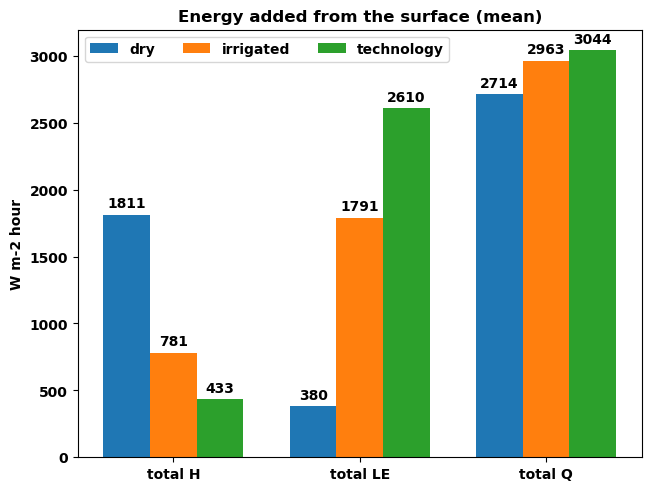

In [84]:
# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("total H", "total LE", "total Q")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1.sumH.mean(), df1.sumLE.mean(), df1.sumQ.mean()])/3600).astype(int),
    'irrigated': (np.array([df2.sumH.mean(), df2.sumLE.mean(), df2.sumQ.mean()])/3600).astype(int),
    'technology': (np.array([df3.sumH.mean(), df3.sumLE.mean(), df3.sumQ.mean()])/3600).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('W m-2 hour')
ax.set_title('Energy added from the surface (mean)')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()

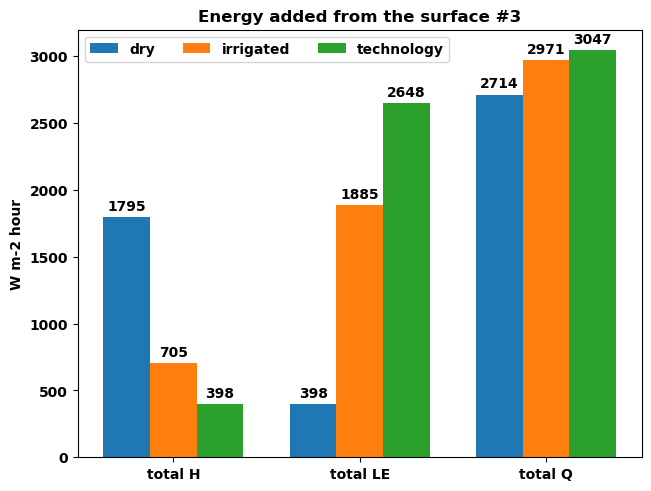

In [85]:
# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

i=2

species = ("total H", "total LE", "total Q")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1.sumH[i], df1.sumLE[i], df1.sumQ[i]])/3600).astype(int),
    'irrigated': (np.array([df2.sumH[i], df2.sumLE[i], df2.sumQ[i]])/3600).astype(int),
    'technology': (np.array([df3.sumH[i], df3.sumLE[i], df3.sumQ[i]])/3600).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('W m-2 hour')
ax.set_title('Energy added from the surface ' + f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()

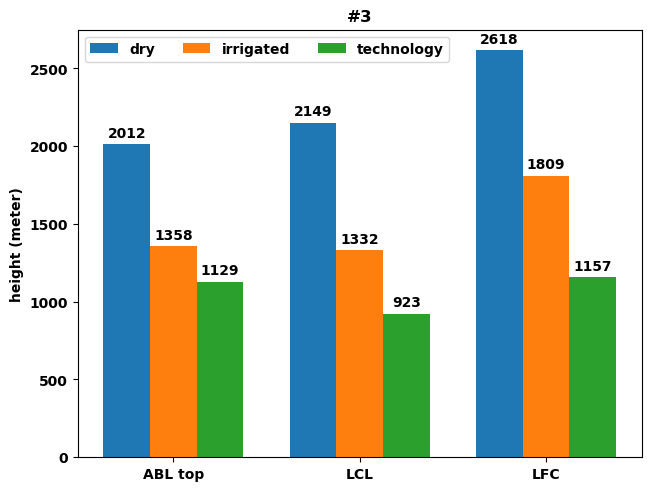

In [86]:
var1 = 'h'
var2 = 'LCL'
var3 = 'LFC'

i=2

# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("ABL top", "LCL", "LFC")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1[var1][i], df1[var2][i], df1[var3][i]])).astype(int),
    'irrigated': (np.array([df2[var1][i], df2[var2][i], df2[var3][i]])).astype(int),
    'technology': (np.array([df3[var1][i], df3[var2][i], df3[var3][i]])).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('height (meter)')
ax.set_title(f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_7848\1209784667.py:15: RuntimeWarning: invalid value encountered in cast
  'irrigated': (np.array([df2[var1][i], df2[var2][i], df2[var3][i]])).astype(int),


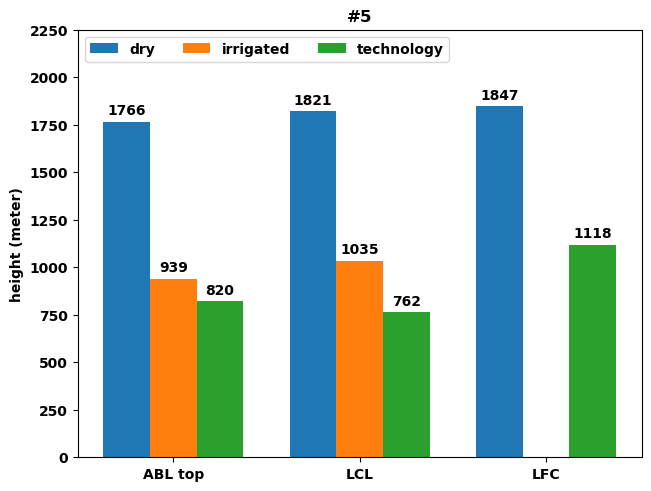

In [87]:
var1 = 'h'
var2 = 'LCL'
var3 = 'LFC'

i=4

# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("ABL top", "LCL", "LFC")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1[var1][i], df1[var2][i], df1[var3][i]])).astype(int),
    'irrigated': (np.array([df2[var1][i], df2[var2][i], df2[var3][i]])).astype(int),
    'technology': (np.array([df3[var1][i], df3[var2][i], df3[var3][i]])).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('height (meter)')
ax.set_title(f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2250)

plt.show()

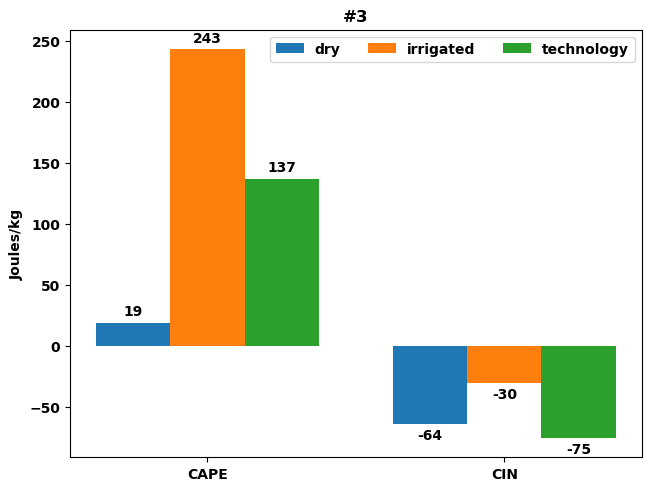

In [88]:
var1 = 'CAPE'
var2 = 'CIN'
# var3 = 'LFC'

i=2

# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("CAPE", "CIN")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1[var1][i], df1[var2][i]])).astype(int),
    'irrigated': (np.array([df2[var1][i], df2[var2][i]])).astype(int),
    'technology': (np.array([df3[var1][i], df3[var2][i]])).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Joules/kg')
ax.set_title(f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
# ax.set_ylim(0, 2250)

plt.show()

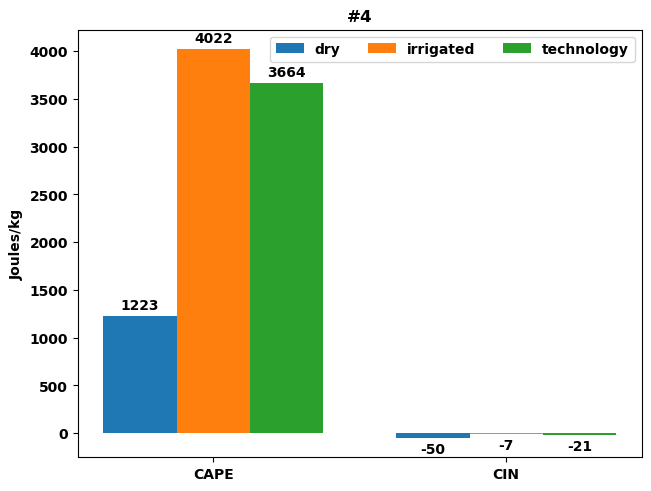

In [89]:
var1 = 'CAPE'
var2 = 'CIN'
# var3 = 'LFC'

i=3

# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("CAPE", "CIN")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1[var1][i], df1[var2][i]])).astype(int),
    'irrigated': (np.array([df2[var1][i], df2[var2][i]])).astype(int),
    'technology': (np.array([df3[var1][i], df3[var2][i]])).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Joules/kg')
ax.set_title(f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
# ax.set_ylim(0, 2250)

plt.show()

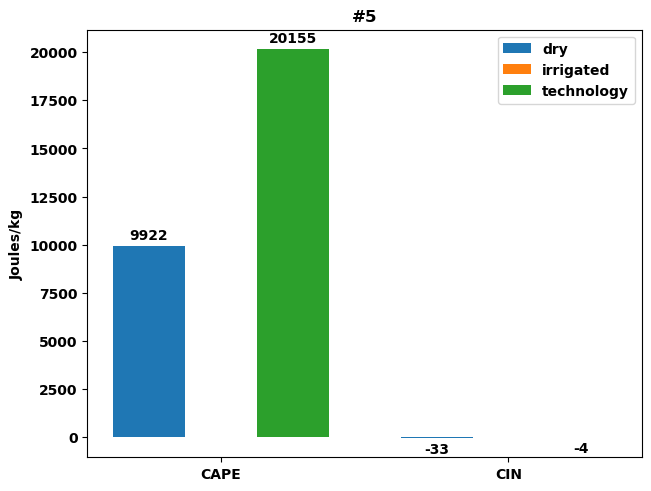

In [90]:
var1 = 'CAPE'
var2 = 'CIN'
# var3 = 'LFC'

i=4

# data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np

species = ("CAPE", "CIN")#("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'dry': (np.array([df1[var1][i], df1[var2][i]])).astype(int),
    # 'irrigated': (np.array([df2[var1][i], df2[var2][i]])).astype(int),
    'irrigated': (np.nan, np.nan),
    'technology': (np.array([df3[var1][i], df3[var2][i]])).astype(int),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Joules/kg')
ax.set_title(f'#{i+1}')
ax.set_xticks(x + width, species)
ax.legend()
# ax.set_ylim(0, 2250)

plt.show()